# International Education Analysis
## by Scott Haluck

## Preliminary Wrangling

> The Programme for International Student Assessment (PISA) 2012 study gathered data about student performance, student life, and school quality from 65 countries. The data is expansive in both breadth and depth, so it can be analyzed from a variety of perspectives.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
# import all data
pisa = pd.read_csv('./pisa2012.csv', encoding='latin-1', low_memory=False)

In [25]:
# identified inconsistent country name formatting
(pisa.NC == 'United States of America ').sum()

10294

In [4]:
# initial investigation into data format
print(pisa.shape)
print(pisa.dtypes.sample(10))
print(pisa.info())
pisa.sample(5)

(485490, 636)
PV1MACQ     float64
SUBNATIO      int64
PV3MAPI     float64
BFMJ2       float64
ST94Q05      object
IC09Q04      object
ST55Q04      object
IC10Q07      object
BELONG      float64
ST61Q04      object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Columns: 636 entries, Unnamed: 0 to VER_STU
dtypes: float64(250), int64(18), object(368)
memory usage: 2.3+ GB
None


,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
399972,399973,Qatar,6340000,QAT0004,Non-OECD,Qatar,152,10722,11,4.0,...,1.5000,1.5000,1.5000,0.5000,0.5000,1.5000,50,2,0.0909,22NOV13
17342,17343,Argentina,320000,ARG0001,Non-OECD,Argentina,38,1100,10,5.0,...,141.4329,141.4329,141.4329,141.4329,47.1443,141.4329,33,1,0.1727,22NOV13
103516,103517,Switzerland,7560000,CHE0915,OECD,Switzerland,284,7503,9,11.0,...,3.7500,3.7500,1.2500,3.7500,1.2500,3.7500,34,1,0.0312,22NOV13
469391,469392,Turkey,7920000,TUR0015,OECD,Turkey,141,4002,9,2.0,...,280.3987,90.7772,281.1550,90.8764,281.3487,93.4625,13,1,0.2130,22NOV13
180178,180179,Finland,2460000,FIN0006,OECD,Finland,159,4504,9,1.0,...,18.1317,6.2556,18.1317,6.2556,18.1317,18.1317,75,2,0.2049,22NOV13


### What is the structure of your dataset?

> The data contains over 400,000 responses with over 600 variables. The variables are a variety of formats: nominal and ordinal categorical, discrete and continuous quantitative, and plain text. The values are simplified and standard scores calculated around Organisation for Economic Co-operation and Development (OECD) characteristics.

### What is/are the main feature(s) of interest in your dataset?

> Student demographics and experience that may contribute to academic achievement:
* Student Demographics
* Family Demographics
* School characteristics

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The summary variables in the data set combine similar measures of student information into a single quantitative or categorical value. This allows for direct comparison between countries and students for analysis. The following variables will be used:
* Student Demographics
    - identification (STIDSTD)
    - country of residence (OECD, NC)
    - gender (ST04Q01)
    - enrollment in preschool (ST05Q01)
    - age at which education began (ST06Q01)
    - immigration status (IMMIG, CULTDIST)
    - language acquisition (EC05Q01, EC06Q01)
    - access to education resources (HEDRES)
    - academic measurements (PV1MATH, PV1READ, PV1SCIE, ANXMAT, MATBEH, MATHEFF, MATINTFC, MATWKETH)
    - social measurements (BELONG, SUBNORM)
* Family Demographics
    - parental levels of education (HISCED, FISCED, MISCED)
    - parental employment (HISEI, OCOD2, OCOD1, BFMJ2, BMMJ1)
    - wealth (CULTPOS, HOMEPOS, WEALTH)
    - status (ESCS)
    - structure (FAMSTRUC)
* School characteristics
    - academic routines (LMINS, MMINS, SMINS)
    - teacher behaviors (CLSMAN, MTSUP, STUDREL, TCHBEHFA, TCHBEHSO, TCHBEHTD, TEACHSUP)


In [12]:
# identify columns of interest and appropriate column names
cols = {'STIDSTD':'student_id',
        'OECD':'oecd',
        'NC':'country',
        'ST05Q01':'preschool',
        'ST06Q01':'age_edu_start',
        'IMMIG':'immigration',
        'CULTDIST':'culture_dist',
        'EC05Q01':'prim_lang',
        'EC06Q01':'age_lang_start',
        'HEDRES':'home_edu_res',
        'PV1MATH':'math_score',
        'PV1READ':'read_score',
        'PV1SCIE':'science_score', 
        'ANXMAT':'math_anxiety',
        'MATBEH':'math_behaviors',
        'MATHEFF':'math_efficacy',
        'MATINTFC':'math_intentions',
        'MATWKETH':'math_work_ethic',
        'SUBNORM':'math_norm',
        'BELONG':'belong',
        'HISCED':'parent_edu',
        'FISCED':'father_edu',
        'MISCED':'mother_edu',
        'HISEI':'parent_occ', 
        'OCOD2':'father_occ',
        'OCOD1':'mother_occ',
        'BFMJ2':'father_occ_status',
        'BMMJ1':'mother_occ_status',
        'CULTPOS':'poss_culture',
        'HOMEPOS':'poss_home', 
        'WEALTH':'wealth',
        'ESCS':'status_index',
        'FAMSTRUC':'fam_struct',
        'LMINS':'lang_min',
        'MMINS':'math_min',
        'SMINS':'science_min',
        'CLSMAN':'teacher_math_man',
        'MTSUP':'teacher_math_sup',
        'STUDREL':'teacher_rel',
        'TCHBEHFA':'teacher_form',
        'TCHBEHSO':'teacher_stud_focus',
        'TCHBEHTD':'teacher_lect',
        'TEACHSUP':'teacher_supp'}

# gather only the columns of interest
pisa_data = pisa.loc[:,cols]
# rename columns with more description
pisa_data.rename(columns=cols, inplace=True)

In [13]:
# test that renaming was successful
pisa_data.sample(5)

,student_id,oecd,country,preschool,age_edu_start,immigration,culture_dist,prim_lang,age_lang_start,home_edu_res,...,lang_min,math_min,science_min,teacher_math_man,teacher_math_sup,teacher_rel,teacher_form,teacher_stud_focus,teacher_lect,teacher_supp
339760,24058,OECD,Mexico,"Yes, for more than one year",5.0,Native,NaN,NaN,NaN,-1.29,...,180.0,240.0,180.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
292777,1918,OECD,Republic of Korea,"Yes, for one year or less",7.0,Native,NaN,<test language> or <other official national la...,NaN,-2.31,...,NaN,NaN,NaN,-1.3771,1.1169,-1.47,1.3625,1.6360,-0.0798,0.11
483817,3287,Non-OECD,Viet Nam,"Yes, for one year or less",6.0,Native,NaN,NaN,NaN,-3.93,...,225.0,180.0,135.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
405394,1,Non-OECD,Perm (Russian Federation),"Yes, for more than one year",7.0,Native,NaN,NaN,NaN,-0.69,...,NaN,NaN,NaN,0.7640,-0.6577,1.13,0.2509,0.7183,-0.0798,0.11
36364,14214,OECD,Australia,"Yes, for one year or less",4.0,Native,NaN,NaN,NaN,1.12,...,NaN,NaN,NaN,-1.0878,-0.2395,-0.79,0.7644,1.9450,2.5630,0.11


In [23]:
# fix inconsistent formatting in country name
pisa_data.country = pisa_data.country.apply(lambda x: x.strip())

In [24]:
# test that formatting was successful
(pisa_data.country == 'United States of America ').sum()

0

In [26]:
# store data of interest for faster loading in the future
pisa_data.to_csv('pisa_summ.csv',index=False)

In [2]:
# load the data of interest
pisa_data = pd.read_csv('pisa_summ.csv', low_memory=False)
pisa_data.head()

,student_id,oecd,country,preschool,age_edu_start,immigration,culture_dist,prim_lang,age_lang_start,home_edu_res,...,lang_min,math_min,science_min,teacher_math_man,teacher_math_sup,teacher_rel,teacher_form,teacher_stud_focus,teacher_lect,teacher_supp
0,1,Non-OECD,Albania,No,6.0,Native,NaN,NaN,NaN,-1.29,...,NaN,NaN,NaN,-1.3771,-0.9508,-1.04,1.3625,0.9374,0.4297,1.68
1,2,Non-OECD,Albania,"Yes, for more than one year",7.0,Native,NaN,NaN,NaN,1.12,...,315.0,270.0,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Non-OECD,Albania,"Yes, for more than one year",6.0,Native,NaN,NaN,NaN,-0.69,...,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Non-OECD,Albania,"Yes, for more than one year",6.0,Native,NaN,NaN,NaN,0.04,...,135.0,135.0,90.0,NaN,1.6748,NaN,0.7644,3.3108,2.3916,1.68
4,5,Non-OECD,Albania,"Yes, for more than one year",6.0,Native,NaN,NaN,NaN,-0.69,...,NaN,NaN,NaN,-0.0784,0.6709,-0.02,0.7644,0.9374,0.4297,0.11


In [3]:
# examine data types for variables
pisa_data.dtypes

student_id              int64
oecd                   object
country                object
preschool              object
age_edu_start         float64
immigration            object
culture_dist          float64
prim_lang              object
age_lang_start         object
home_edu_res          float64
math_score            float64
read_score            float64
science_score         float64
math_anxiety          float64
math_behaviors        float64
math_efficacy         float64
math_intentions       float64
math_work_ethic       float64
math_norm             float64
belong                float64
parent_edu             object
father_edu             object
mother_edu             object
parent_occ            float64
father_occ             object
mother_occ             object
father_occ_status     float64
mother_occ_status     float64
poss_culture          float64
poss_home             float64
wealth                float64
status_index          float64
fam_struct            float64
lang_min  

In [4]:
# examine the format of the object type in age_lang_start
pisa_data.age_lang_start.unique()

array([nan, '0 to 3 years', '4 to 6 years', '10 to 12 years',
       '7 to 9 years', '13 years or older'], dtype=object)

In [5]:
# investigate summary statistcs for numerical variables
pisa_data.describe()

,student_id,age_edu_start,culture_dist,home_edu_res,math_score,read_score,science_score,math_anxiety,math_behaviors,math_efficacy,...,lang_min,math_min,science_min,teacher_math_man,teacher_math_sup,teacher_rel,teacher_form,teacher_stud_focus,teacher_lect,teacher_supp
count,485490.000000,457994.000000,13380.000000,477772.000000,485490.000000,485490.000000,485490.000000,314764.000000,313847.000000,315948.000000,...,282866.000000,283303.000000,270914.000000,312708.000000,313599.000000,313860.000000,314678.000000,315114.000000,315519.000000,316371.000000
mean,6134.066201,6.148963,-0.075938,-0.195442,469.621653,472.004640,475.769824,0.152647,0.241209,-0.046626,...,219.276636,226.007056,211.122460,0.083241,0.177720,0.123262,0.137930,0.209052,0.147423,0.152789
std,6733.144944,0.970693,1.008322,1.074053,103.265391,102.505523,101.464426,0.955031,1.054971,0.973588,...,97.997730,97.448421,131.368322,0.990321,1.011025,1.029343,1.027669,1.045459,1.051583,0.995688
min,1.000000,4.000000,-2.721000,-3.930000,19.792800,0.083400,2.648300,-2.370000,-2.140200,-3.750000,...,0.000000,0.000000,0.000000,-3.253000,-2.864500,-3.110000,-2.391900,-1.599900,-3.653100,-2.920000
25%,1811.000000,6.000000,-0.790100,-0.690000,395.318600,403.600700,404.457300,-0.470000,-0.456700,-0.630000,...,165.000000,180.000000,120.000000,-0.449900,-0.657700,-0.480000,-0.594500,-0.580900,-0.561200,-0.470000
50%,3740.000000,6.000000,-0.051100,0.040000,466.201900,475.455000,475.699400,0.060000,0.217100,-0.180000,...,200.000000,220.000000,180.000000,-0.078400,0.248600,-0.020000,0.250900,0.221700,0.167200,0.110000
75%,7456.000000,7.000000,0.353500,1.120000,541.057800,544.502500,547.780700,0.790000,0.811000,0.540000,...,250.000000,250.000000,270.000000,0.764000,1.116900,0.810000,0.764400,0.718300,0.722800,0.970000
max,33806.000000,16.000000,1.535500,1.120000,962.229300,904.802600,903.338300,2.550000,4.424900,2.270000,...,2400.000000,3000.000000,2975.000000,2.198900,1.843300,2.160000,2.629500,3.310800,2.563000,1.680000


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

### Test Scores
Examine the distributions of the math, reading, and science evaluations of student performance.

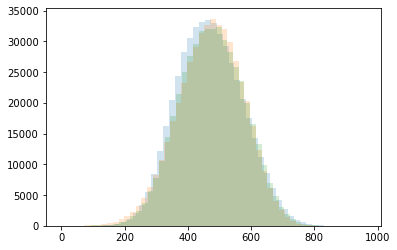

In [6]:
plt.hist(pisa_data.math_score,bins=50, alpha=0.2)
plt.hist(pisa_data.read_score,bins=50, alpha=0.2)
plt.hist(pisa_data.science_score,bins=50, alpha=0.2);

All three evaluations are Normally distributed with centers around 470.

### Instructional Minutes
Examine the distribution of instructional minutes of math, language, and science.

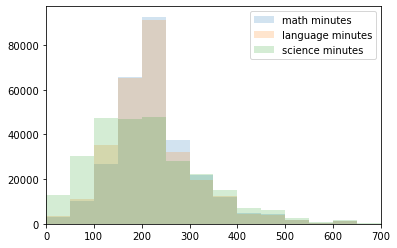

In [7]:
bins = np.arange(0,710,50)
plt.hist(pisa_data.math_min,bins=bins, alpha=0.2)
plt.hist(pisa_data.lang_min,bins=bins, alpha=0.2)
plt.hist(pisa_data.science_min,bins=bins, alpha=0.2)
plt.xlim(0,700)
plt.legend(labels = ['math minutes','language minutes','science minutes']);

Instructional time seems to be consistently spread in math and language,  150-250 minutes per week. Instructional time for science has more variability from student to student.

### Immigration
Examine the distribution of the different generations of immigrants in the study.

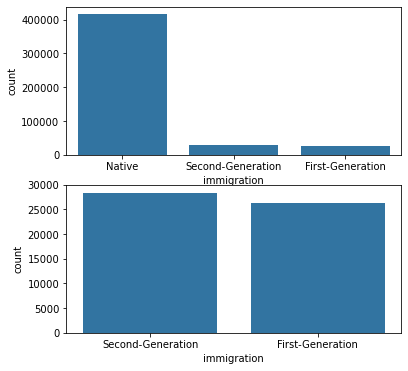

In [32]:
base_color = sb.color_palette()[0]
plt.figure(figsize=(6,6))
plt.subplot(211)
sb.countplot(data = pisa_data, x = 'immigration', color = base_color);
plt.subplot(212)
sb.countplot(data = pisa_data[pisa_data.immigration.isin(['Second-Generation','First-Generation'])], x = 'immigration', color = base_color)
plt.ylim(0,30000);

Most of the students in the data set are native to their country, but there are still considerable numbers of second- and first-generation immigrants to analyze.

### Parental Education and Employment
Investigate the levels of education and employment for parents.

In [29]:
# organize the levels of parent education in ordered data
levels = ['None', 'ISCED 1', 'ISCED 2', 'ISCED 3B, C', 'ISCED 3A, ISCED 4', 'ISCED 5B', 'ISCED 5A, 6']
edu_levels = pd.api.types.CategoricalDtype(ordered=True, categories = levels)
pisa_data['parent_edu'] = pisa_data['parent_edu'].astype(edu_levels)
pisa_data['father_edu'] = pisa_data['father_edu'].astype(edu_levels)
pisa_data['mother_edu'] = pisa_data['mother_edu'].astype(edu_levels)


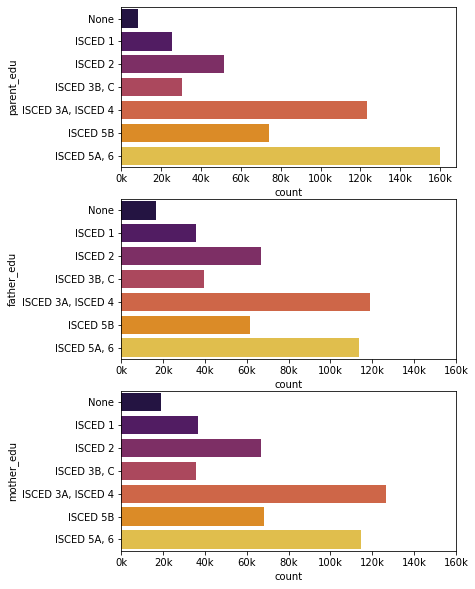

In [45]:
plt.figure(figsize=(6,10))
xticks = np.arange(0,170000,20000)
xlabels = ['0k','20k','40k','60k','80k','100k','120k','140k','160k']
plt.subplot(311)
sb.countplot(data = pisa_data, y = 'parent_edu', palette = 'inferno')
plt.xticks(xticks,xlabels)
plt.subplot(312)
sb.countplot(data = pisa_data, y = 'father_edu', palette = 'inferno')
plt.xticks(xticks,xlabels)
plt.subplot(313)
sb.countplot(data = pisa_data, y = 'mother_edu', palette = 'inferno')
plt.xticks(xticks,xlabels);

Distribution between parental education is fairly consistent between father and mother. Spikes occur at the traditional levels of lower secondary (ISCED 2), upper secondary (ISCED 3A or 4), and university or graduate studies (ISCED 5A or 6). Approximately half of the students in the study have a parent with some college education.

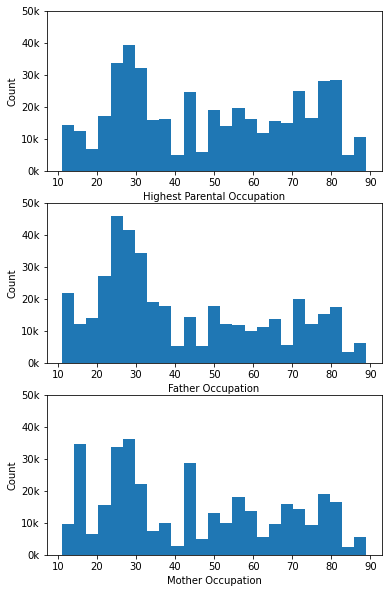

In [60]:
yticks = np.arange(0,51000,10000)
ylabels = ['0k','10k','20k','30k','40k','50k']
plt.figure(figsize=(6,10))
plt.subplot(311)
plt.hist(pisa_data.parent_occ, bins = 25)
plt.yticks(yticks,ylabels)
plt.ylabel('Count')
plt.xlabel('Highest Parental Occupation')
plt.subplot(312)
plt.hist(pisa_data.father_occ_status, bins = 25)
plt.yticks(yticks,ylabels)
plt.ylabel('Count')
plt.xlabel('Father Occupation')
plt.subplot(313)
plt.hist(pisa_data.mother_occ_status, bins = 25)
plt.yticks(yticks,ylabels)
plt.ylabel('Count')
plt.xlabel('Mother Occupation');

In [57]:
pisa_data[['parent_occ','father_occ_status','mother_occ_status']].describe()

,parent_occ,father_occ_status,mother_occ_status
count,450621.000000,416150.000000,364814.000000
mean,48.923298,42.423367,44.408617
std,22.120953,21.622126,22.018510
min,11.010000,11.010000,11.010000
25%,28.520000,25.390000,25.040000
50%,48.820000,34.250000,43.330000
75%,70.340000,60.920000,65.010000
max,88.960000,88.960000,88.960000


Distribution of occupational level for parents is fairly spread out with a mean of approximately 49 and a standard deviation of 22 (with a minumum of 11 and maximum of 89). When parental occupation is analyzed by gender, the lower quartiles are fairly similar to one another, then the distribution of mother's occupation takes a small lead over father's occupation.

C:\Users\sjhal\Anaconda3\envs\dap\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\sjhal\Anaconda3\envs\dap\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


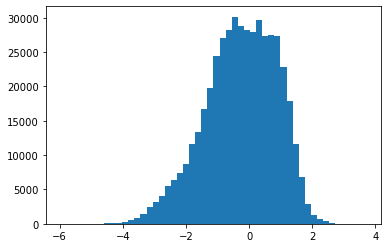

In [9]:
plt.hist(pisa_data.status_index, bins = 50);

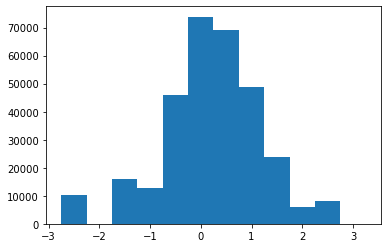

In [10]:
plt.hist(pisa_data.math_anxiety, bins = np.arange(-2.75,3.35,0.5));

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!